# Практическая работа №1: Формирование и первичная обработка выборки. Ранжированный и интервальный ряды

Выполнила студентка гр. 1384 Шиняева Анастасия. Вариант №4

## Цель работы

Ознакомление с основными правилами формирования выборки и подготовки выборочных данных к статистическому анализу.

## Основные теоретические положения

**Статистический ряд** - последовательность элементов
выборки, расположенных в порядке их получения
(наблюдения).

**Ранжированный ряд** - последовательность элементов
выборки, расположенных в порядке возрастания их
значений.

**Вариационный ряд** - получается из ранжированного
ряда в результате объединения одинаковых элементов. Элементы вариационного ряда называются *вариантами*.

**Интервальный ряд** - если количество *вариант* достаточно велико, то
необходимо разделять вариационный ряд на интервалы. В
этом случае ряд называется **интервальным**.

**Полигон частот** - ломаная, соединяющая точки, соответствующие срединным значениям интервалов и частотам этих интервалов, срединные значения откладываются по оси х, а частоты – по оси у.

**Гистограмма** - столбчатая диаграмма, представляющая частотное распределение данных.

**Эмпирическая функция распределения** - функция $F(x)$,
определяющая для каждого значения $х$ относительную
частоту события $X<х$

$F(x) = \frac{\Sigma\{x_i\} } {N}$, где $x_i$ - элементы выборки.

## Постановка задачи

Осуществить формирование репрезентативной выборки заданного объема из имеющейся генеральной совокупности экспериментальных данных. Осуществить последовательное преобразование полученной выборки в ранжированный, вариационный и интервальный ряды. Применительно к интервальному ряду построить и отобразить графически полигон, гистограмму и эмпирическую функцию распределения для абсолютных и относительных частот. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

Подключим необходимые библиотеки.

In [705]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Загрузим саму выборку и выведем ее первые и последние элементы, чтобы проверить, правильно ли все загрузилось.

In [706]:
data = pd.read_csv('/data.csv', header=None, names=['nu', 'E'])

print("Размер выборки:", len(data))
print("\nПервые 5 строк выборки:")
print(data.head(5))
print("\nПоследние 5 строк выборки:")
print(data.tail(5))

Размер выборки: 101

Первые 5 строк выборки:
    nu      E
0  480  153.3
1  510  129.4
2  426  119.0
3  482  139.9
4  393  103.2

Последние 5 строк выборки:
      nu      E
96   487  146.0
97   532  158.7
98   330   71.1
99   438  134.1
100  593  187.4


Построим ранжированный и вариационный ряды по столбцу E.

In [707]:
ranked_data = data['E'].sort_values()
print("Ранжированный ряд:")
print(", ".join(map(str, ranked_data)))

variational_data = data['E'].sort_values().unique()
print("\nВариационный ряд:")
print(", ".join(map(str, variational_data)))

print("\nРазмер вариационного ряда:", len(variational_data))

Ранжированный ряд:
64.5, 71.1, 71.9, 72.6, 74.1, 82.7, 83.8, 85.1, 86.1, 86.8, 89.0, 90.1, 95.5, 97.9, 100.0, 102.9, 103.2, 103.6, 105.3, 105.8, 107.5, 108.1, 108.7, 109.1, 109.3, 110.0, 112.9, 113.0, 113.8, 115.4, 116.3, 117.9, 118.0, 118.4, 119.0, 119.5, 119.7, 120.5, 120.8, 121.2, 122.3, 122.8, 122.9, 123.9, 124.2, 124.2, 124.3, 124.5, 126.7, 127.7, 128.2, 128.5, 128.9, 129.2, 129.4, 131.1, 131.5, 132.5, 132.5, 134.1, 134.1, 134.2, 134.9, 135.7, 136.4, 136.7, 137.4, 138.6, 139.4, 139.9, 139.9, 140.4, 140.5, 140.9, 143.1, 143.4, 143.6, 143.8, 144.9, 145.3, 146.0, 146.1, 147.5, 148.3, 148.5, 148.7, 153.3, 153.6, 155.4, 155.5, 155.8, 156.5, 157.4, 158.4, 158.7, 159.0, 162.3, 164.4, 174.6, 175.7, 187.4

Вариационный ряд:
64.5, 71.1, 71.9, 72.6, 74.1, 82.7, 83.8, 85.1, 86.1, 86.8, 89.0, 90.1, 95.5, 97.9, 100.0, 102.9, 103.2, 103.6, 105.3, 105.8, 107.5, 108.1, 108.7, 109.1, 109.3, 110.0, 112.9, 113.0, 113.8, 115.4, 116.3, 117.9, 118.0, 118.4, 119.0, 119.5, 119.7, 120.5, 120.8, 121.2, 122.

По формуле Стерджесса вычисляем необходимое количество интервалов для построения интервального ряда.

In [708]:
k = 1 + 3.31 * np.log10(len(data))
k

7.634303747220547

Полученное значение округляется до целого. Рекомендуется выбирать нечетное количество интервалов.

Пусть будет 7 интервалов. Посчитаем ширину интервала и границы.

In [709]:
min_value = data['E'].min()
max_value = data['E'].max()

bin_edges = 7
h = (max_value - min_value) / bin_edges

intervals = [min_value + i * h for i in range(bin_edges + 1)]

print("Минимальное значение:", min_value)
print("\nМаксимальное значение:", max_value)
print("\nШирина интервала h:", h)
print("\nГраницы интервалов:", intervals)

Минимальное значение: 64.5

Максимальное значение: 187.4

Ширина интервала h: 17.557142857142857

Границы интервалов: [64.5, 82.05714285714285, 99.61428571428571, 117.17142857142858, 134.72857142857143, 152.28571428571428, 169.84285714285716, 187.4]


Найдем середины интервалов и накопленные абсолютные и относительные частоты.

In [710]:
absolute_freq, bin_edges = np.histogram(data['E'], bins=bin_edges)
bin_mid = (bin_edges[:-1] + bin_edges[1:]) / 2
relative_freq = absolute_freq / len(data)

cumulative_absolute_freq = np.cumsum(absolute_freq)
cumulative_relative_freq = np.cumsum(relative_freq)

print("Интервал:")
print([f"{bin_edges[i]:.2f}-{bin_edges[i+1]:.2f}" for i in range(len(bin_edges)-1)])
print("\nСередина интервала (x̃_i):")
print(", ".join(map(str, bin_mid)))
print("\nАбсолютная частота (m_i):")
print(", ".join(map(str, absolute_freq)))
print("\nОтносительная частота (m̃_i)")
print(", ".join(map(str, relative_freq)))
print("\nНакопленная абсолютная частота (m_i^max)")
print(", ".join(map(str, cumulative_absolute_freq)))
print("\nНакопленная относительная частота (m̃_i^max)")
print(", ".join(map(str, cumulative_relative_freq)))

Интервал:
['64.50-82.06', '82.06-99.61', '99.61-117.17', '117.17-134.73', '134.73-152.29', '152.29-169.84', '169.84-187.40']

Середина интервала (x̃_i):
73.27857142857142, 90.83571428571429, 108.39285714285714, 125.95, 143.50714285714287, 161.06428571428572, 178.62142857142857

Абсолютная частота (m_i):
5, 9, 17, 31, 24, 12, 3

Относительная частота (m̃_i)
0.04950495049504951, 0.0891089108910891, 0.16831683168316833, 0.3069306930693069, 0.2376237623762376, 0.1188118811881188, 0.0297029702970297

Накопленная абсолютная частота (m_i^max)
5, 14, 31, 62, 86, 98, 101

Накопленная относительная частота (m̃_i^max)
0.04950495049504951, 0.13861386138613863, 0.306930693069307, 0.613861386138614, 0.8514851485148516, 0.9702970297029704, 1.0


Интервальный ряд представим в виде таблицы, где

$ \tilde x_i $ - середина $ i $-го частичного интервала;

$ m_i $ - абсолютная частота $ i $-го частичного интервала;

$ \tilde{m}_i $ - относительная частота $ i $-го частичного интервала;

$ m^{\textit{нак}}_i $ - накопленная абсолютная частота для $ i $-го частичного интервала;

$ \tilde{m}^{\textit{нак}}_i $ - накопленная относительная частота для $ i $-го частичного интервала.

|    $ i $   |             Границы интервала            |   $ \tilde{x}_i $   | $ m_i $ |   $ \tilde{m}_i $   | $ m^{\textit{нак}}_i $ | $ \tilde{m}^{\textit{нак}}_i $ |
|:----------:|:----------------------------------------:|:------------------:|:-------:|:-------------------:|:----------------------:|:------------------------------:|
|      1     |         [64.5, 82.05714285714285)        |  73.27857142857142 |    5    | 0.04950495049504951 |            5           |       0.04950495049504951      |
|      2     |  [82.05714285714285, 99.61428571428571)  |  90.83571428571429 |    9    |  0.0891089108910891 |           14           |       0.13861386138613863      |
|      3     |  [99.61428571428571, 117.17142857142858) | 108.39285714285714 |    17   | 0.16831683168316833 |           31           |        0.306930693069307       |
|      4     | [117.17142857142858, 134.72857142857143) |       125.95       |    31   |  0.3069306930693069 |           62           |        0.613861386138614       |
|      5     | [134.72857142857143, 152.28571428571428) | 143.50714285714287 |    24   |  0.2376237623762376 |           86           |       0.8514851485148516       |
|      6     | [152.28571428571428, 169.84285714285716) | 161.06428571428572 |    12   |  0.1188118811881188 |           98           |       0.9702970297029704       |
|      7     |        [169.84285714285716, 187.4]       | 178.62142857142857 |    3    |  0.0297029702970297 |           101          |               1.0              |
| $ \Sigma $ |                     -                    |          -         |   101   |         1.0         |            -           |                -               |

Построим полигон частот, гистограмму и эмпирическую функцию для абсолютных и относительных частот.

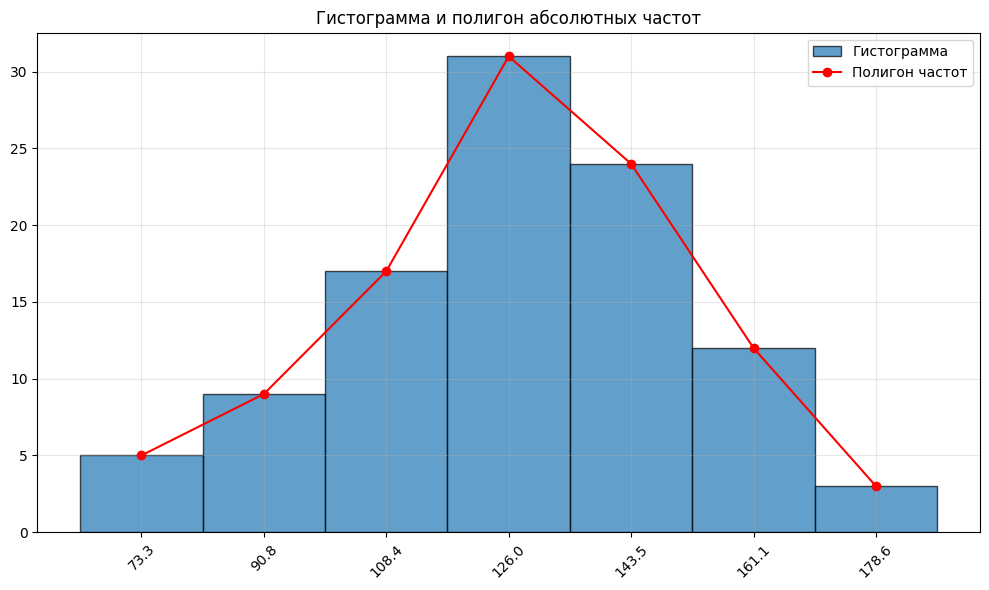

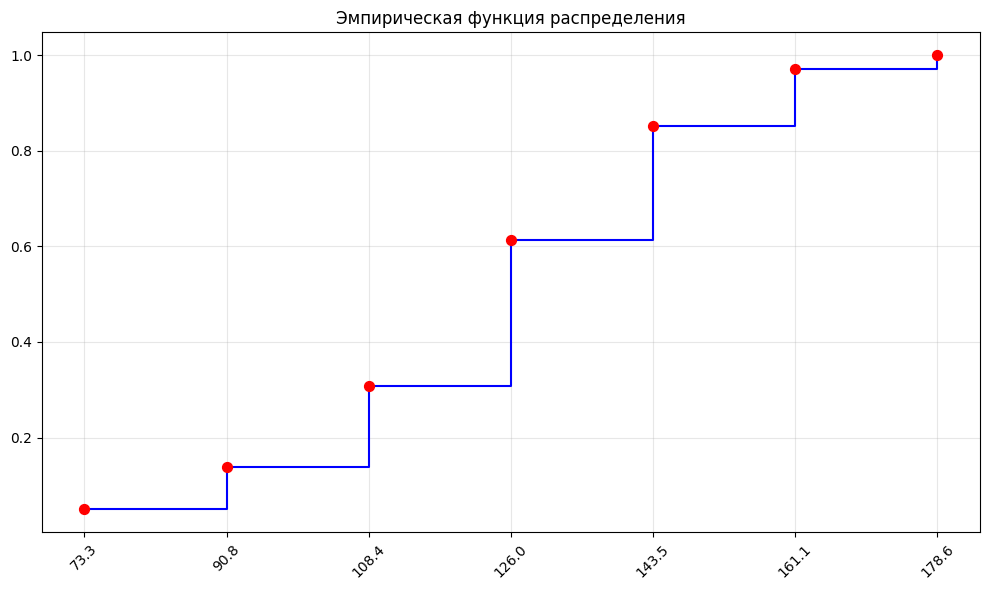

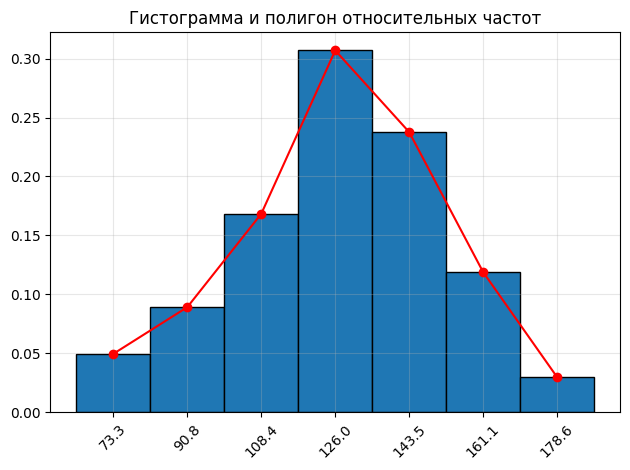

In [711]:
plt.figure(figsize=(10, 6))

#Гистограмма
plt.hist(data['E'], bins=bin_edges, edgecolor='black', alpha=0.7, label='Гистограмма')

#Полигон частот
plt.plot(bin_mid, absolute_freq, 'ro-', label='Полигон частот')

plt.title('Гистограмма и полигон абсолютных частот')
plt.xticks(bin_mid, rotation=45)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#ЭФР
plt.figure(figsize=(10, 6))
plt.step(bin_mid, cumulative_relative_freq, where='post', color='blue')

plt.scatter(bin_mid, cumulative_relative_freq, color='red', s=50, zorder=3)

plt.title('Эмпирическая функция распределения')
plt.xticks(bin_mid, rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#Гистограмма
hist, edges = np.histogram(data['E'], bins=bin_edges)
freq = hist / float(hist.sum())
width = np.diff(edges)
plt.bar(edges[:len(edges)-1], freq, width=width, align="edge", ec="k")

#Полигон частот
plt.plot(bin_mid, relative_freq, 'ro-', label='Полигон частот')

plt.title('Гистограмма и полигон относительных частот')
plt.xticks(bin_mid, rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Вывод: 1 и 3 графики по сути идентичны, отличаются лишь своими масштабами (1:100). Относительные частоты рассчитываются как отношение абсолютных частот к общему количеству наблюдений в выборке, поэтому масштаб изменяется, но форма распределения остаётся прежней. Форма гистограммы напоминает колокол (симметричное распределение), это может указывать на то, что данные близки к нормальному распределению. Гистограмма немного смещена вправо и имеет один явный пик.

2 график ЭФР растёт равномерно, значит, данные обработаны корректно и распределены равномерно.

Построим ранжированный и вариационный ряды по столбцу nu.

In [712]:
ranked_data = data['nu'].sort_values()
print("Ранжированный ряд:")
print(", ".join(map(str, ranked_data)))

variational_data = data['nu'].sort_values().unique()
print("\nВариационный ряд:")
print(", ".join(map(str, variational_data)))

print("\nРазмер вариационного ряда:", len(variational_data))

Ранжированный ряд:
320, 320, 321, 330, 331, 340, 344, 351, 351, 359, 362, 386, 386, 390, 391, 392, 393, 393, 395, 396, 396, 399, 402, 403, 405, 406, 408, 411, 412, 415, 416, 418, 418, 419, 421, 421, 422, 423, 426, 433, 433, 434, 434, 434, 437, 438, 438, 440, 440, 442, 443, 443, 443, 449, 452, 453, 453, 461, 463, 463, 463, 463, 465, 465, 467, 468, 472, 474, 475, 480, 481, 482, 482, 483, 484, 486, 487, 488, 490, 496, 500, 502, 503, 504, 505, 506, 508, 510, 510, 514, 514, 523, 525, 532, 542, 543, 545, 547, 566, 569, 593

Вариационный ряд:
320, 321, 330, 331, 340, 344, 351, 359, 362, 386, 390, 391, 392, 393, 395, 396, 399, 402, 403, 405, 406, 408, 411, 412, 415, 416, 418, 419, 421, 422, 423, 426, 433, 434, 437, 438, 440, 442, 443, 449, 452, 453, 461, 463, 465, 467, 468, 472, 474, 475, 480, 481, 482, 483, 484, 486, 487, 488, 490, 496, 500, 502, 503, 504, 505, 506, 508, 510, 514, 523, 525, 532, 542, 543, 545, 547, 566, 569, 593

Размер вариационного ряда: 79


Пусть будет 7 интервалов. Посчитаем ширину интервала и границы.

In [713]:
min_value = data['nu'].min()
max_value = data['nu'].max()

bin_edges = 7
h = (max_value - min_value) / bin_edges

intervals = [min_value + i * h for i in range(bin_edges + 1)]

print("Минимальное значение:", min_value)
print("\nМаксимальное значение:", max_value)
print("\nШирина интервала h:", h)
print("\nГраницы интервалов:", intervals)

Минимальное значение: 320

Максимальное значение: 593

Ширина интервала h: 39.0

Границы интервалов: [320.0, 359.0, 398.0, 437.0, 476.0, 515.0, 554.0, 593.0]


Найдем середины интервалов и накопленные абсолютные и относительные частоты.

In [714]:
absolute_freq, bin_edges = np.histogram(data['nu'], bins=bin_edges)
bin_mid = (bin_edges[:-1] + bin_edges[1:]) / 2
relative_freq = absolute_freq / len(data)

cumulative_absolute_freq = np.cumsum(absolute_freq)
cumulative_relative_freq = np.cumsum(relative_freq)

print("Интервал:")
print([f"{bin_edges[i]:.2f}-{bin_edges[i+1]:.2f}" for i in range(len(bin_edges)-1)])
print("\nСередина интервала (x̃_i):")
print(", ".join(map(str, bin_mid)))
print("\nАбсолютная частота (m_i):")
print(", ".join(map(str, absolute_freq)))
print("\nОтносительная частота (m̃_i)")
print(", ".join(map(str, relative_freq)))
print("\nНакопленная абсолютная частота (m_i^max)")
print(", ".join(map(str, cumulative_absolute_freq)))
print("\nНакопленная относительная частота (m̃_i^max)")
print(", ".join(map(str, cumulative_relative_freq)))

Интервал:
['320.00-359.00', '359.00-398.00', '398.00-437.00', '437.00-476.00', '476.00-515.00', '515.00-554.00', '554.00-593.00']

Середина интервала (x̃_i):
339.5, 378.5, 417.5, 456.5, 495.5, 534.5, 573.5

Абсолютная частота (m_i):
9, 12, 23, 25, 22, 7, 3

Относительная частота (m̃_i)
0.0891089108910891, 0.1188118811881188, 0.22772277227722773, 0.24752475247524752, 0.21782178217821782, 0.06930693069306931, 0.0297029702970297

Накопленная абсолютная частота (m_i^max)
9, 21, 44, 69, 91, 98, 101

Накопленная относительная частота (m̃_i^max)
0.0891089108910891, 0.2079207920792079, 0.43564356435643564, 0.6831683168316831, 0.9009900990099009, 0.9702970297029703, 1.0


Интервальный ряд представим в виде таблицы, где

$ \tilde x_i $ - середина $ i $-го частичного интервала;

$ m_i $ - абсолютная частота $ i $-го частичного интервала;

$ \tilde{m}_i $ - относительная частота $ i $-го частичного интервала;

$ m^{\textit{нак}}_i $ - накопленная абсолютная частота для $ i $-го частичного интервала;

$ \tilde{m}^{\textit{нак}}_i $ - накопленная относительная частота для $ i $-го частичного интервала.

|    $ i $   | Границы интервала | $ \tilde x_i $ | $ m_i $ |   $ \tilde{m}_i $   | $ m^{\textit{нак}}_i $ | $ \tilde{m}^{\textit{нак}}_i $ |
|:----------:|:-----------------:|:--------------:|:-------:|:-------------------:|:----------------------:|:------------------------------:|
|      1     |   [320.0, 359.0)  |      339.5     |    9    |  0.0891089108910891 |            9           |       0.0891089108910891       |
|      2     |   [359.0, 398.0)  |      378.5     |    12   |  0.1188118811881188 |           21           |       0.2079207920792079       |
|      3     |   [398.0, 437.0)  |      417.5     |    23   | 0.22772277227722773 |           44           |       0.43564356435643564      |
|      4     |   [437.0, 476.0)  |      456.5     |    25   | 0.24752475247524752 |           69           |       0.6831683168316831       |
|      5     |   [476.0, 515.0)  |      495.5     |    22   | 0.21782178217821782 |           91           |       0.9009900990099009       |
|      6     |   [515.0, 554.0)  |      534.5     |    7    | 0.06930693069306931 |           98           |       0.9702970297029703       |
|      7     |   [554.0, 593.0]  |      573.5     |    3    |  0.0297029702970297 |           101          |               1.0              |
| $ \Sigma $ |         -         |        -       |   101   |         1.0         |            -           |                -               |

Построим полигон частот, гистограмму и эмпирическую функцию для абсолютных и относительных частот.

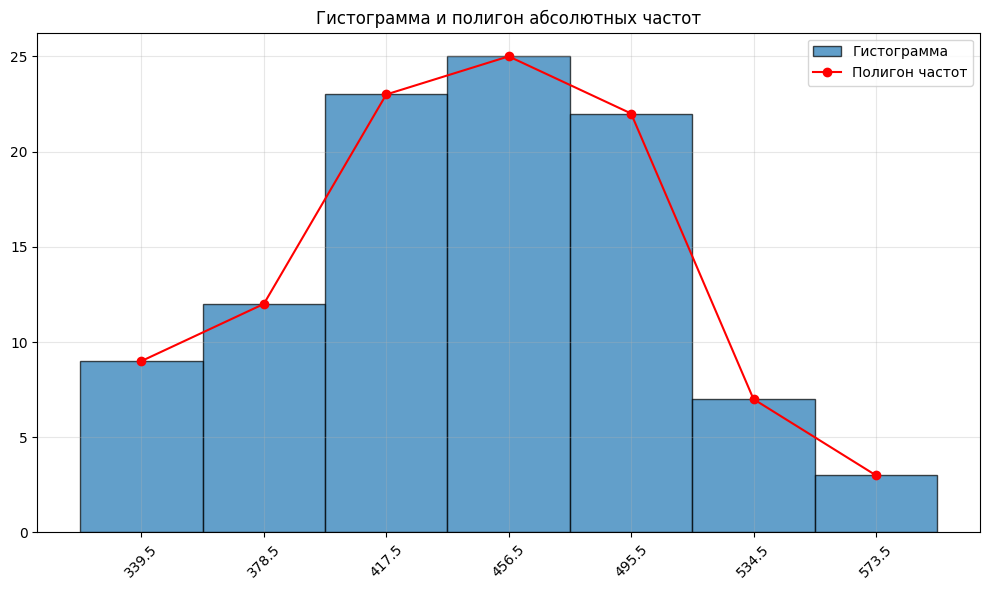

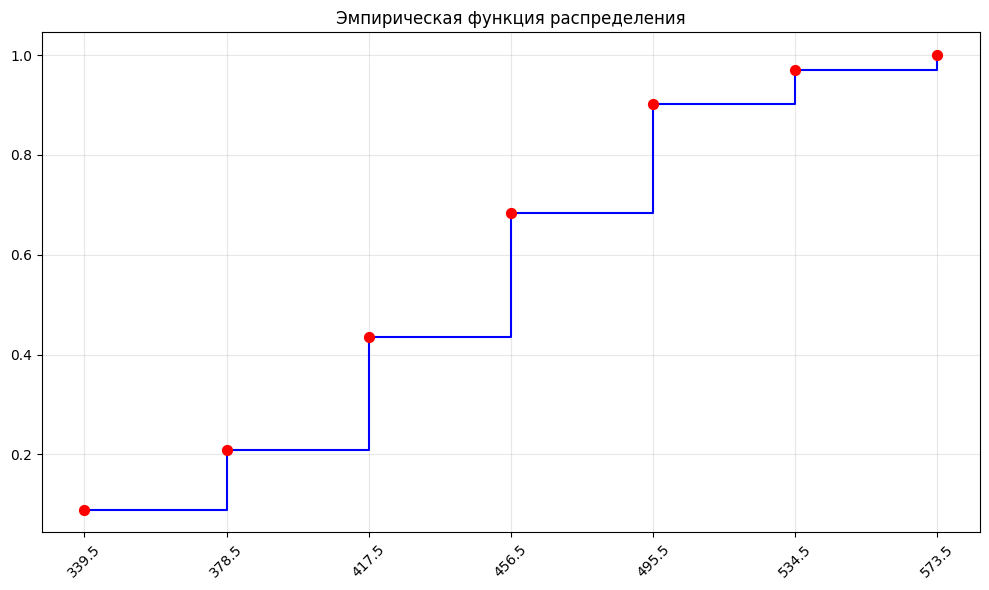

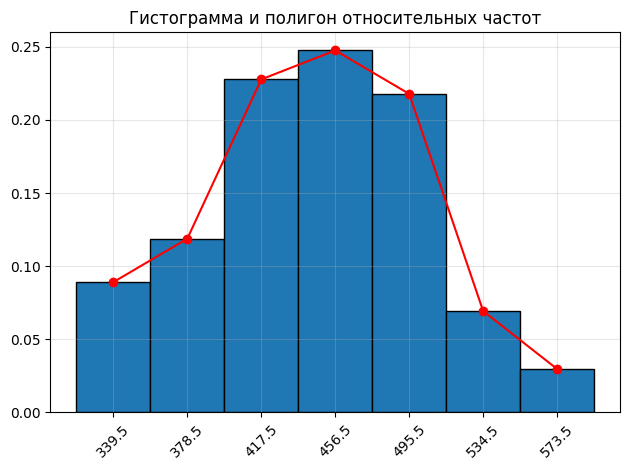

In [715]:
plt.figure(figsize=(10, 6))

#Гистограмма
plt.hist(data['nu'], bins=bin_edges, edgecolor='black', alpha=0.7, label='Гистограмма')

#Полигон частот
plt.plot(bin_mid, absolute_freq, 'ro-', label='Полигон частот')

plt.title('Гистограмма и полигон абсолютных частот')
plt.xticks(bin_mid, rotation=45)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#ЭФР
plt.figure(figsize=(10, 6))
plt.step(bin_mid, cumulative_relative_freq, where='post', color='blue')

plt.scatter(bin_mid, cumulative_relative_freq, color='red', s=50, zorder=3)

plt.title('Эмпирическая функция распределения')
plt.xticks(bin_mid, rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#Гистограмма
hist, edges = np.histogram(data['nu'], bins=bin_edges)
freq = hist / float(hist.sum())
width = np.diff(edges)
plt.bar(edges[:len(edges)-1], freq, width=width, align="edge", ec="k")

#Полигон частот
plt.plot(bin_mid, relative_freq, 'ro-', label='Полигон частот')

plt.title('Гистограмма и полигон относительных частот')
plt.xticks(bin_mid, rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Выводы: 1 и 3 графики по сути идентичны, отличаются лишь своими масштабами (1:100). Относительные частоты рассчитываются как отношение абсолютных частот к общему количеству наблюдений в выборке, поэтому масштаб изменяется, но форма распределения остаётся прежней. Форма гистограммы напоминает колокол (симметричное распределение), это может указывать на то, что данные близки к нормальному распределению. Гистограмма немного смещена влево и имеет большой пик из 3 интервалов.

2 график ЭФР растёт равномерно, значит, данные обработаны корректно и распределены равномерно.

## Выводы

В ходе выполнения лабораторной работы были изучены и применены основные методы формирования и первичной обработки выборки.

Была сформирована выборка заданного объема 101 из имеющихся экспериментальных данных. Полученная выборка была последовательно преобразована в ранжированный, вариационный и интервальный ряды. Это позволило структурировать и систематизировать информацию для дальнейшего анализа.

Для визуального представления данных были построены и изучены полигон, гистограмма и эмпирическая функция распределения как для абсолютных, так и для относительных частот. Эти визуализации помогли лучше понять характер распределения данных и сделать выводы о его свойствах.